In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for better plot styles
sns.set(style="whitegrid")

In [12]:
df=pd.read_csv("/content/sample_data/GOOG (1).csv")

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [14]:
# Load your data

# df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
print(df['Close'].head(10))
print(df['Close'].isnull().sum())


Date
2004-08-19    2.499133
2004-08-20    2.697639
2004-08-23    2.724787
2004-08-24    2.611960
2004-08-25    2.640104
2004-08-26    2.687676
2004-08-27    2.643840
2004-08-30    2.540727
2004-08-31    2.549693
2004-09-01    2.496891
Name: Close, dtype: float64
0


In [16]:
print(df.describe())
print(df.info())

              Open         High          Low        Close    Adj Close  \
count  4746.000000  4746.000000  4746.000000  4746.000000  4746.000000   
mean     39.348927    39.766486    38.945433    39.363665    39.363665   
std      36.428023    36.849919    36.043046    36.451340    36.451340   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.702699    12.855813    12.594480    12.702388    12.702388   
50%      26.110470    26.340184    25.848034    26.136879    26.136879   
75%      55.612499    56.245624    55.060537    55.688124    55.688124   
max     151.863495   152.100006   149.887497   150.709000   150.709000   

             Volume  
count  4.746000e+03  
mean   1.212097e+08  
std    1.522641e+08  
min    1.584340e+05  
25%    2.925750e+07  
50%    6.536409e+07  
75%    1.501898e+08  
max    1.650833e+09  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4746 entries, 2004-08-19 to 2023-06-27
Data columns (total 6 columns):
 #   Column

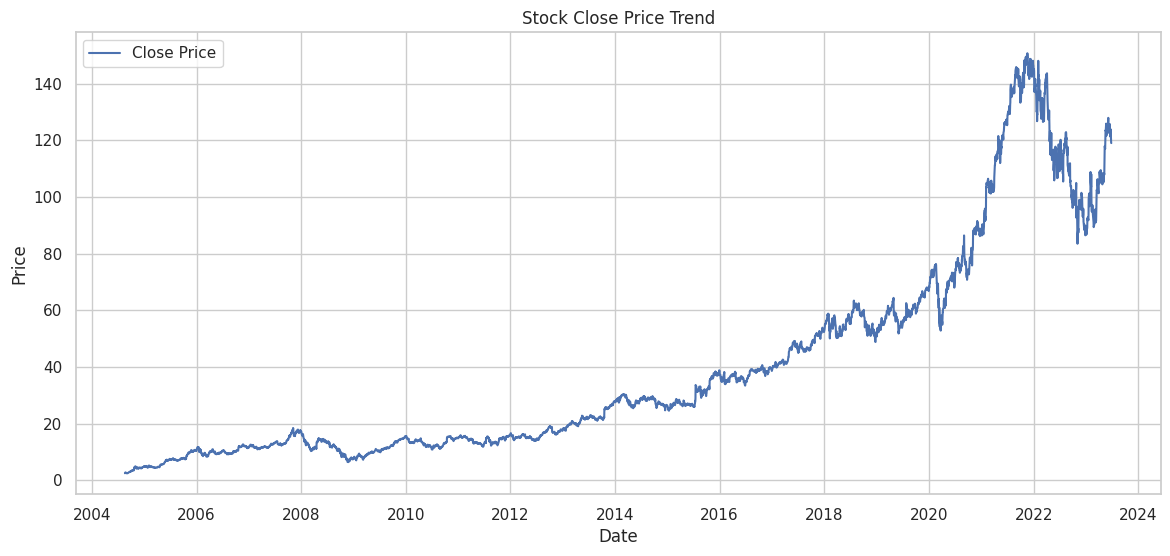

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.title("Stock Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

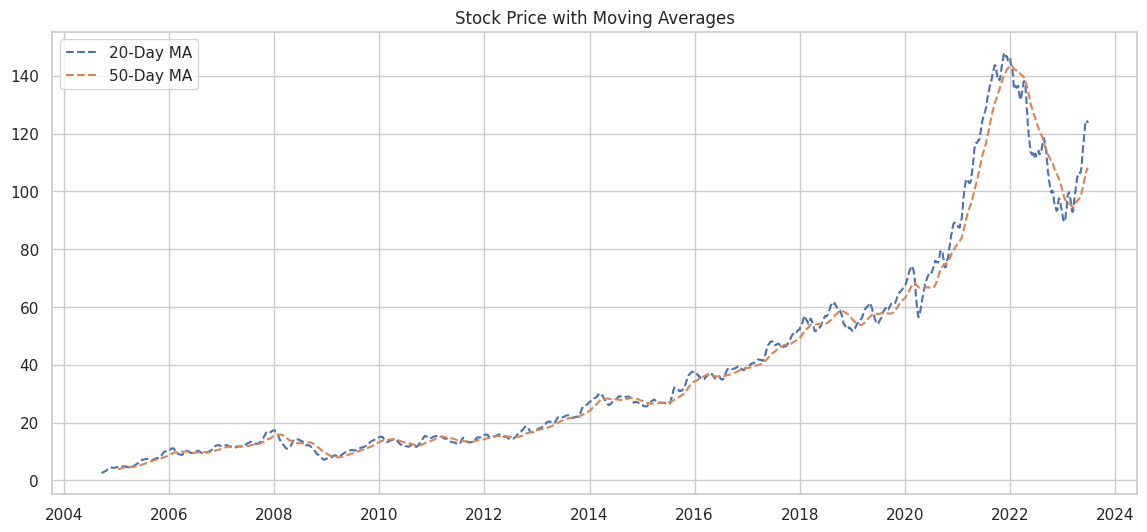

In [18]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day MA
df['MA100'] = df['Close'].rolling(window=100).mean()  # 100-day MA

plt.figure(figsize=(14,6))
# plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA', linestyle='--')
plt.plot(df['MA100'], label='50-Day MA', linestyle='--')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

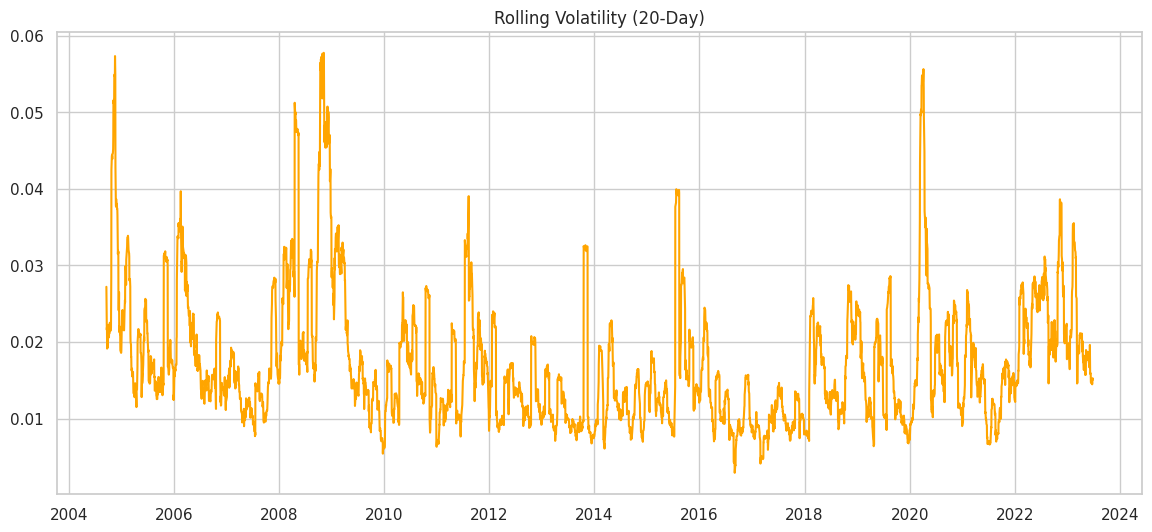

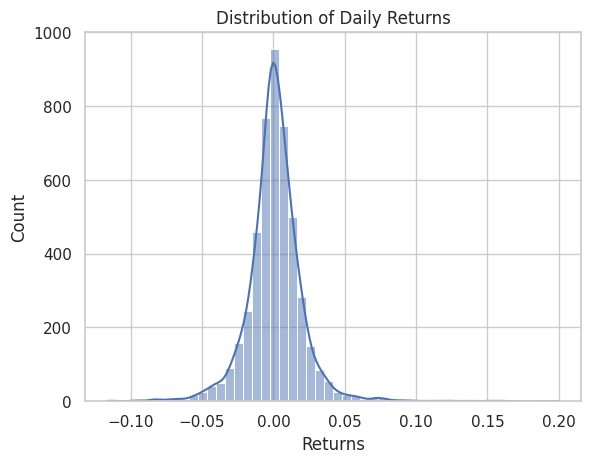

In [19]:
df['Returns'] = df['Close'].pct_change()  # daily returns
df['Volatility'] = df['Returns'].rolling(window=20).std()  # rolling volatility

plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], color='orange')
plt.title("Rolling Volatility (20-Day)")
plt.show()

sns.histplot(df['Returns'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

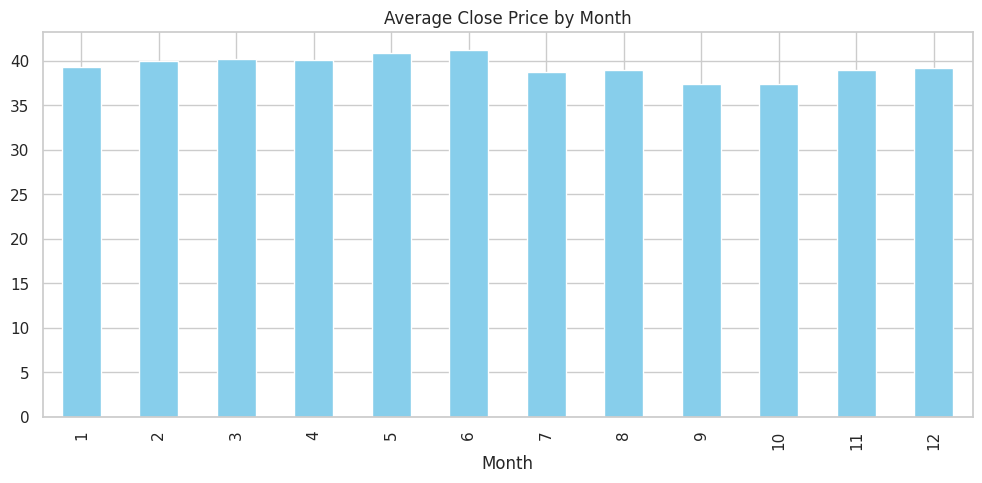

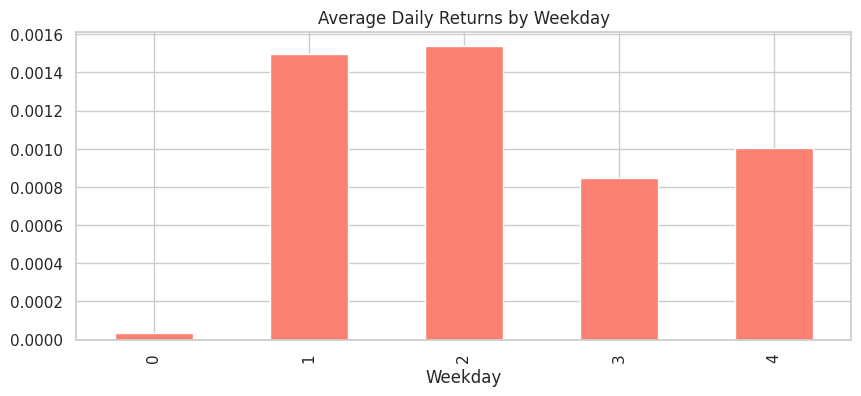

In [20]:
# Extract month, day of week
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

# Monthly average close
monthly_avg = df.groupby('Month')['Close'].mean()
monthly_avg.plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title("Average Close Price by Month")
plt.show()

# Weekday average returns
weekday_avg = df.groupby('Weekday')['Returns'].mean()
weekday_avg.plot(kind='bar', figsize=(10,4), color='salmon')
plt.title("Average Daily Returns by Weekday")
plt.show()

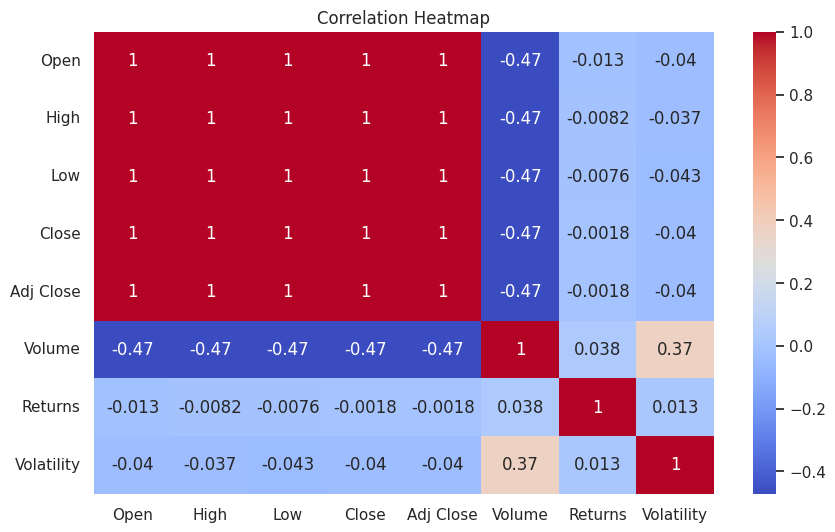

In [21]:
corr_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns', 'Volatility']
plt.figure(figsize=(10,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()

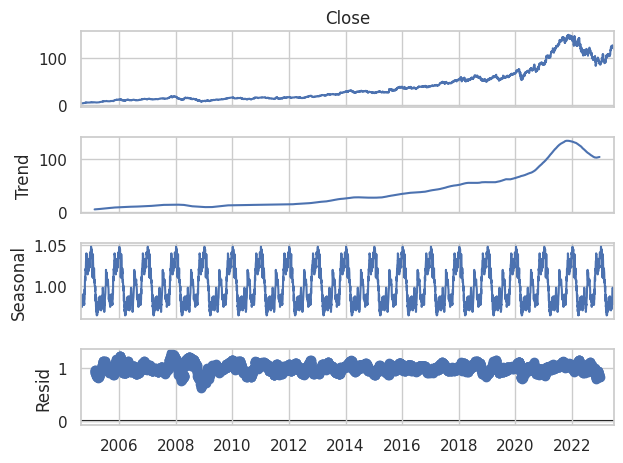

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # ~1 year of trading days

result.plot()
plt.show()

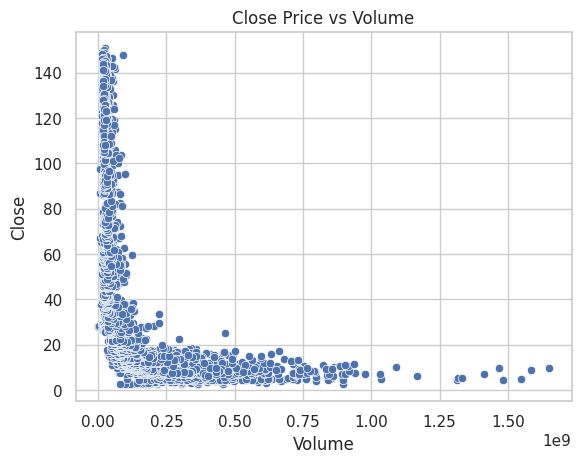

In [24]:
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title("Close Price vs Volume")
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.587647
p-value: 0.987307


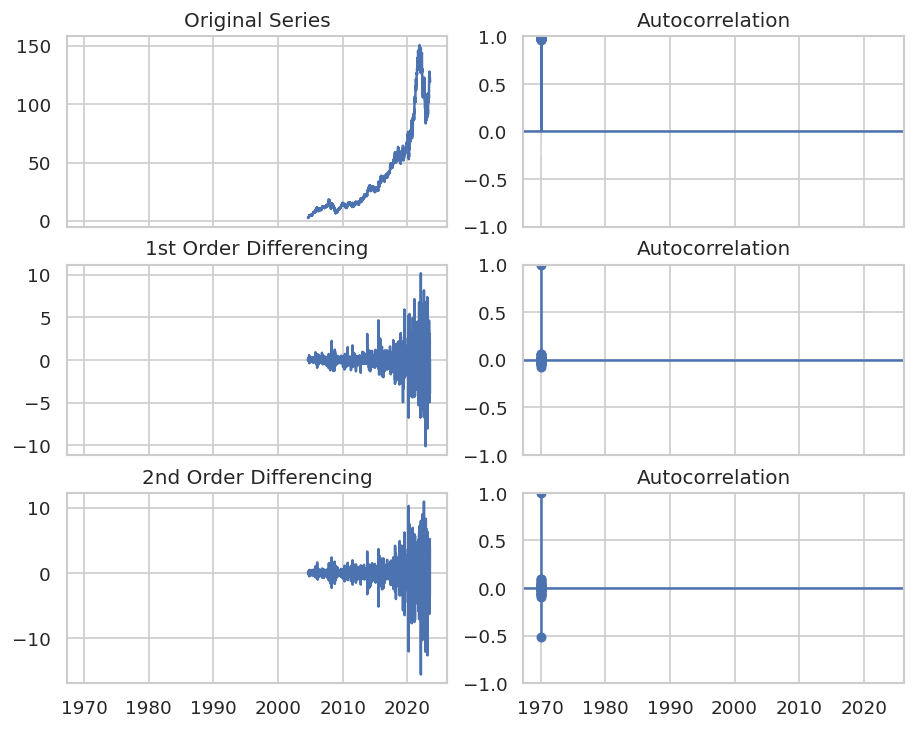

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name='Series'):
    result = adfuller(series.dropna())
    print(f'ADF Statistic ({name}): {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print(f"--> {name} is stationary (reject H0)\n")
    else:
        print(f"--> {name} is non-stationary (fail to reject H0)\n")

# Original
adf_test(df['Close'], 'Original Series')

# 1st Difference
adf_test(df['Close'].diff(), '1st Difference')

# 2nd Difference
adf_test(df['Close'].diff().diff(), '2nd Difference')



ADF Statistic (Original Series): 0.5876
p-value: 0.9873
Critical Values: {'1%': np.float64(-3.4317379644584283), '5%': np.float64(-2.8621533220147395), '10%': np.float64(-2.567096473458761)}
--> Original Series is non-stationary (fail to reject H0)

ADF Statistic (1st Difference): -13.3712
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.4317379644584283), '5%': np.float64(-2.8621533220147395), '10%': np.float64(-2.567096473458761)}
--> 1st Difference is stationary (reject H0)

ADF Statistic (2nd Difference): -20.8852
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.4317388488068734), '5%': np.float64(-2.862153712704679), '10%': np.float64(-2.5670966814400473)}
--> 2nd Difference is stationary (reject H0)



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':120})


In [29]:
def find_d(series, max_diff=5):
    current_series = series
    for d in range(max_diff+1):
        p_value = adfuller(current_series.dropna())[1]
        if p_value <= 0.05:
            return d
        current_series = current_series.diff()
    return max_diff  # fallback if not stationary

d = find_d(df['Close'])
print(f"Number of differences needed for stationarity (d): {d}")


Number of differences needed for stationarity (d): 1


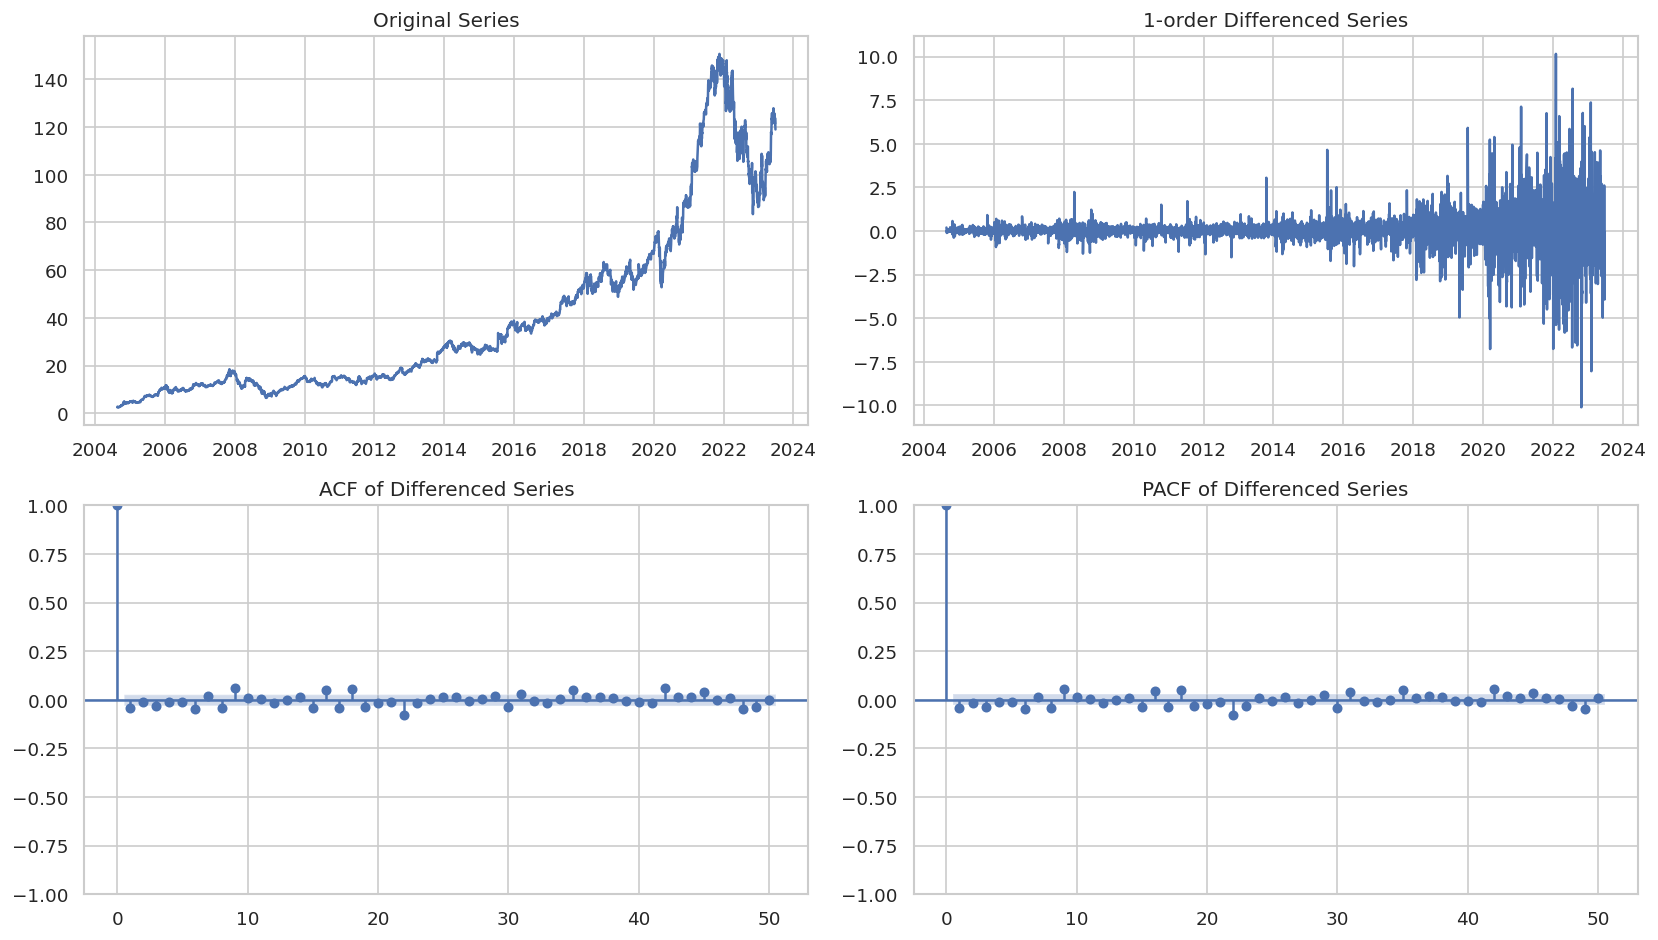

In [30]:
# Differencing as needed
series_to_use = df['Close'].copy()
for i in range(d):
    series_to_use = series_to_use.diff()

# Plot Original & Differenced Series
fig, axes = plt.subplots(2,2, figsize=(14,8))

# Original
axes[0,0].plot(df['Close']); axes[0,0].set_title("Original Series")

# Differenced
axes[0,1].plot(series_to_use); axes[0,1].set_title(f"{d}-order Differenced Series")

# ACF & PACF
plot_acf(series_to_use.dropna(), ax=axes[1,0], lags=50)
axes[1,0].set_title("ACF of Differenced Series")

plot_pacf(series_to_use.dropna(), ax=axes[1,1], lags=50)
axes[1,1].set_title("PACF of Differenced Series")

plt.tight_layout()
plt.show()


In [31]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

def suggest_pq(series, nlags=50):
    n = len(series.dropna())
    conf_int = 2/np.sqrt(n)  # 95% CI

    acf_vals = acf(series.dropna(), nlags=nlags)
    pacf_vals = pacf(series.dropna(), nlags=nlags)

    # For PACF: find first significant peak (absolute value above conf_int)
    p_candidates = np.where(np.abs(pacf_vals[1:]) > conf_int)[0] + 1
    q_candidates = np.where(np.abs(acf_vals[1:]) > conf_int)[0] + 1

    # Pick the largest significant lag before decay
    p = p_candidates[0] if len(p_candidates) > 0 else 0
    q = q_candidates[0] if len(q_candidates) > 0 else 0

    # Optional: ignore very small lags (like lag=1), pick next peak
    if p == 1 and len(p_candidates) > 1:
        p = p_candidates[1]
    if q == 1 and len(q_candidates) > 1:
        q = q_candidates[1]

    return p, q

p, q = suggest_pq(series_to_use)
print(f"Suggested ARIMA hyperparameters: p={p}, d={d}, q={q}")


Suggested ARIMA hyperparameters: p=3, d=1, q=3


<Figure size 1440x480 with 0 Axes>

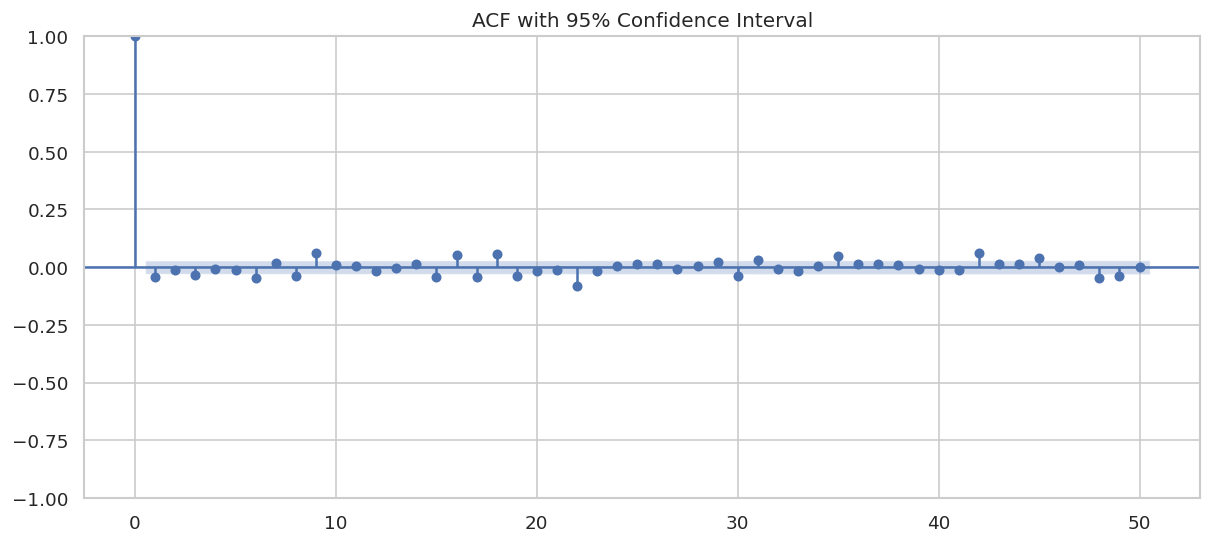

<Figure size 1440x480 with 0 Axes>

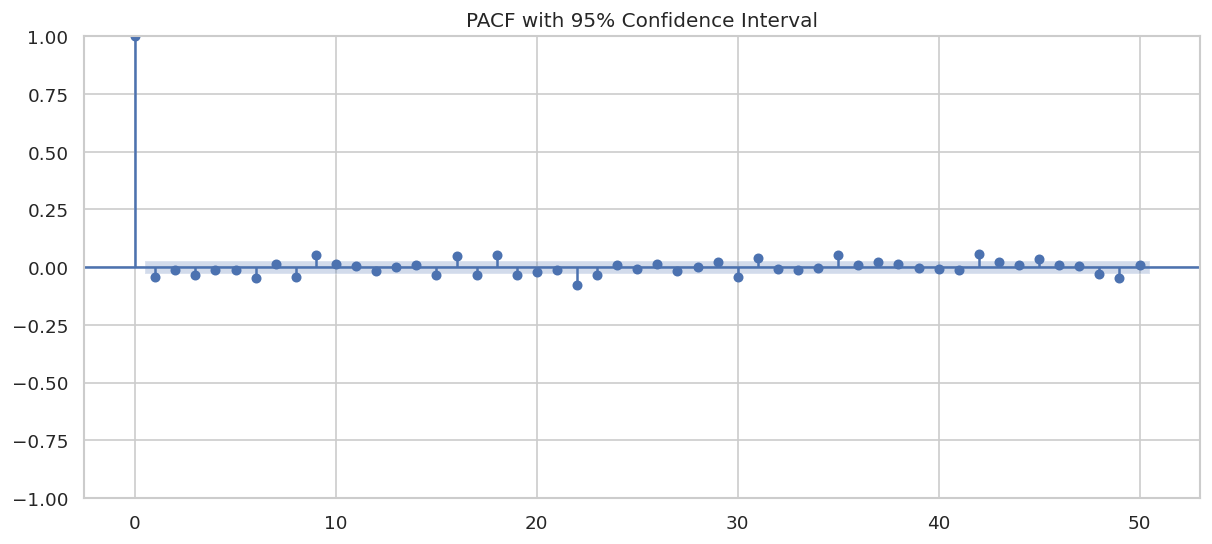

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plot_acf(series_to_use.dropna(), lags=50, alpha=0.05)
plt.title("ACF with 95% Confidence Interval")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(series_to_use.dropna(), lags=50, alpha=0.05)
plt.title("PACF with 95% Confidence Interval")
plt.show()

In [33]:
model = ARIMA(df['Close'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4746
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -6746.678
Date:                Sat, 22 Nov 2025   AIC                          13507.356
Time:                        11:06:47   BIC                          13552.610
Sample:                             0   HQIC                         13523.259
                               - 4746                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5806      0.034    -17.159      0.000      -0.647      -0.514
ar.L2          0.2078      0.049      4.281      0.000       0.113       0.303
ar.L3          0.8191      0.034     24.177      0.0

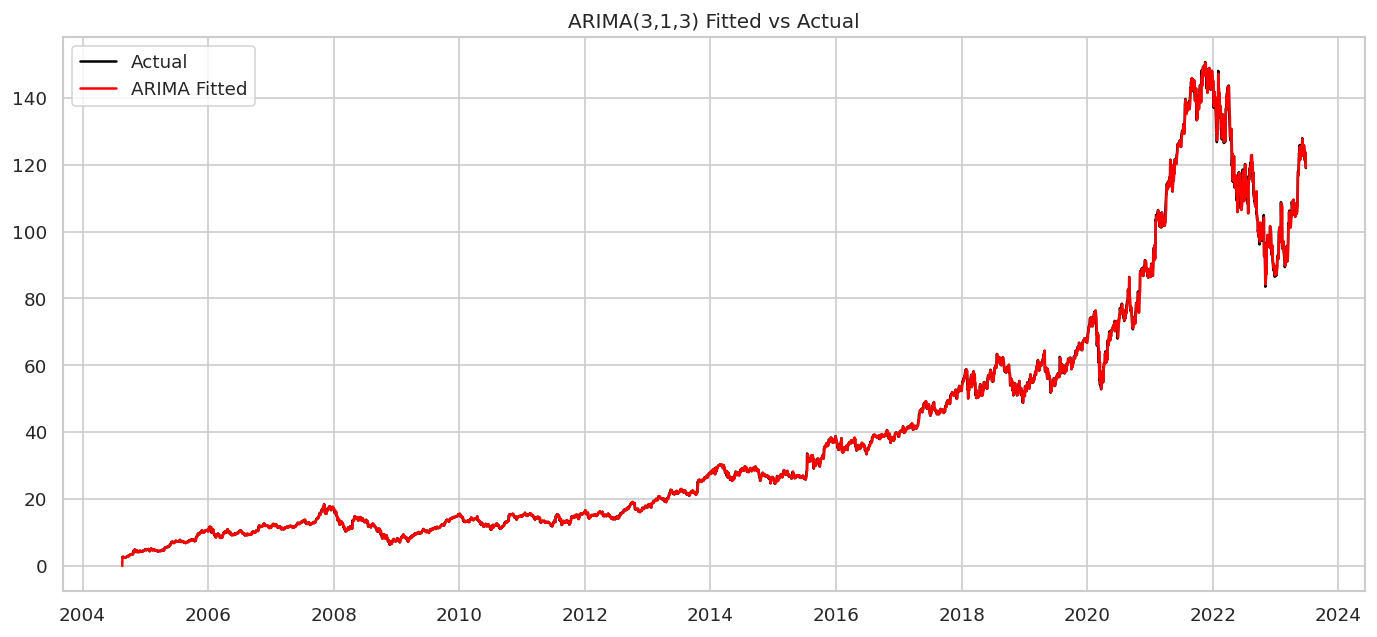

In [34]:
df['ARIMA_Fitted'] = model_fit.fittedvalues

plt.figure(figsize=(14,6))
plt.plot(df['Close'], color="black",label="Actual")
plt.plot(df['ARIMA_Fitted'], color='red', label="ARIMA Fitted")
plt.title(f"ARIMA({p},{d},{q}) Fitted vs Actual")
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [36]:
# Original series
actual = df['Close']

# Fitted values
fitted = model_fit.fittedvalues

# Align lengths
if len(fitted) < len(actual):
    actual_aligned = actual.iloc[-len(fitted):]
elif len(fitted) > len(actual):
    fitted = fitted.iloc[-len(actual):]
    actual_aligned = actual
else:
    actual_aligned = actual

# Now compute metrics safely
mae = mean_absolute_error(actual_aligned, fitted)
rmse = np.sqrt(mean_squared_error(actual_aligned, fitted))
mape = np.mean(np.abs((actual_aligned - fitted)/actual_aligned))*100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")



MAE: 0.5076
RMSE: 1.0034
MAPE: 1.33%


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout


In [38]:
# Use 'Close' price
data = df['Close'].values.reshape(-1,1)

# Scale data to [0,1] for deep learning
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data_scaled, seq_length)

# Reshape for CNN-LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [45]:
# 1. Train-Test Split (Before Scaling)
data = df['Close'].values.reshape(-1,1)

train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# 2. Scale using ONLY train data
scaler = MinMaxScaler()
scaler.fit(train_data)              # <-- prevents data leakage

train_scaled = scaler.transform(train_data)
test_scaled  = scaler.transform(test_data)

# 3. Function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60

# Create sequences separately for train & test
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test   = create_sequences(test_scaled, seq_length)

#Reshape for CNN-LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [46]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 58, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,307 (91.04 KB)

 Trainable params: 23,307 (91.04 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0087 - val_loss: 0.0015
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 9.9478e-04 - val_loss: 0.0021
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 9.3864e-04 - val_loss: 8.5115e-04
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.7963e-04 - val_loss: 7.5090e-04
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.4872e-04 - val_loss: 7.4085e-04
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8.7411e-04 - val_loss: 6.9741e-04
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.1392e-04 - val_loss: 6.6755e-04
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.3627e-04 - val_loss: 0.0013
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.0508e-04 - val_lo

In [48]:
y_pred = model.predict(X_test)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [50]:
from sklearn.metrics import r2_score

def adjusted_r2(y_true, y_pred, n_features=1):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    if n - n_features - 1 == 0:
        return r2  # avoid division by zero; fallback to plain R2
    adj_r2 = 1 - (1-r2)*(n-1)/(n-n_features-1)
    return adj_r2
print("Adjusted R²:", round(adj_r2, 2))

Adjusted R²: 0.83


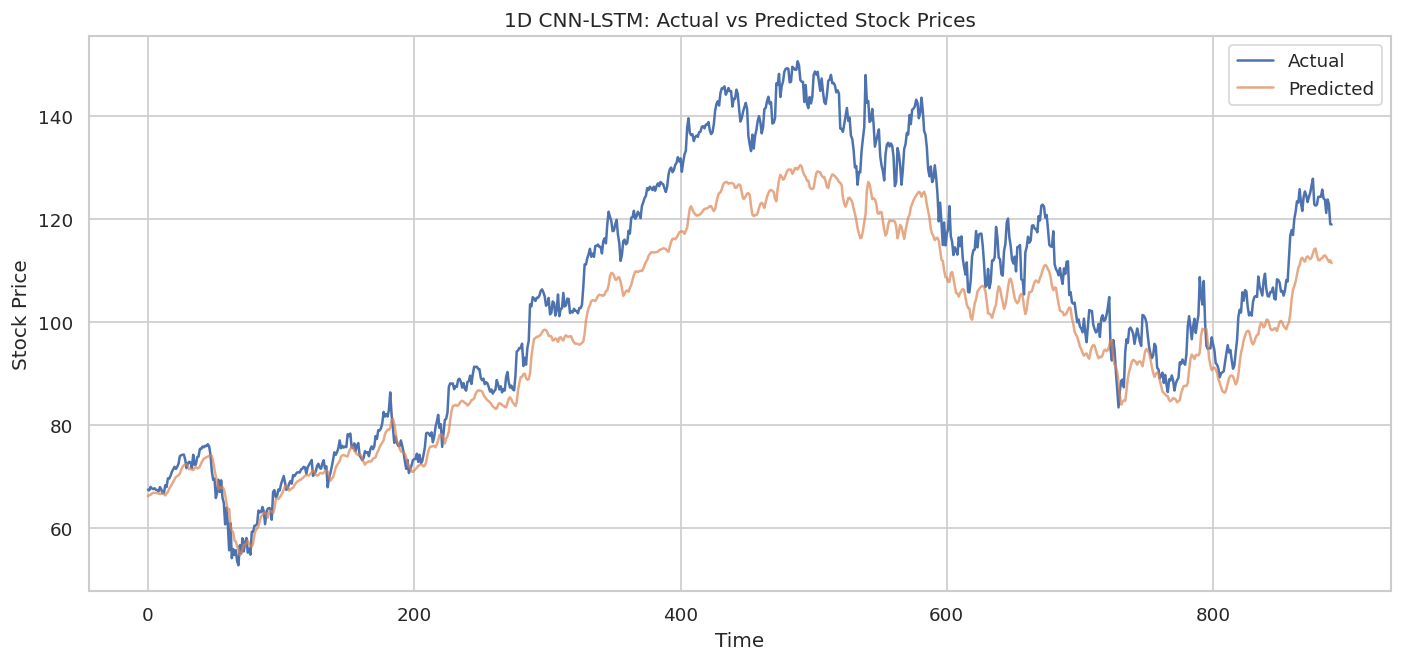

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(y_pred_scaled, label='Predicted', alpha=0.7)
plt.title("1D CNN-LSTM: Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()